/tmp/ipykernel_72286/2130524787.py:163: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.asarray(imageio.imread(image_file_name))


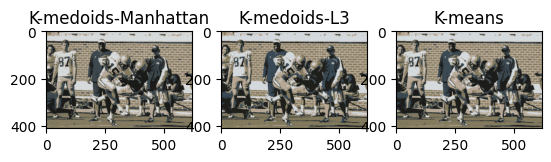

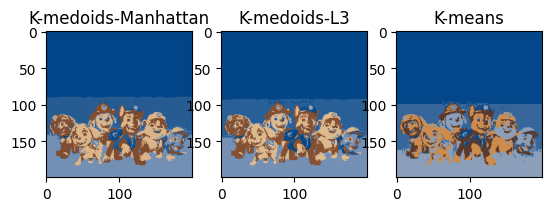

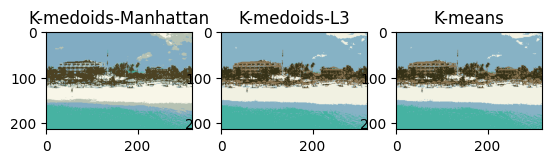

In [15]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import sys
import os

def mykmeans(pixels, K):
    """
    Your goal of this assignment is implementing your own K-means.

    Input:
        pixels: data set. Each row contains one data point. For image
        dataset, it contains 3 columns, each column corresponding to Red,
        Green, and Blue component.

        K: the number of desired clusters. Too high value of K may result in
        empty cluster error. Then, you need to reduce it.

    Output:
        clusters: the class assignment of each data point in pixels. The
        assignment should be 0, 1, 2, etc. For K = 5, for example, each cell
        of class should be either 0, 1, 2, 3, or 4. The output should be a
        column vector with size(pixels, 1) elements.

        centroid: the location of K centroids in your result. With images,
        each centroid corresponds to the representative color of each
        cluster. The output should be a matrix with size(pixels, 1) rows and
        3 columns. The range of values should be [0, 255].
    """
    # Flatten the image to a 2D array of pixels
    pixels = pixels.reshape(-1, 3)
    
    # Randomly initialize the centroids
    centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]
    
    for _ in range(100):
        # Assign each pixel to the nearest cluster center
        distances = compute_dist_euclidian(pixels, centroids)
        clusters = np.argmin(distances, axis=1)
        
        # Calculate new cluster centroids
        new_centroids = np.array([pixels[clusters == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids
    
def mykmedoidsL3(pixels, K):
    # Flatten the image to a 2D array of pixels
    pixels = pixels.reshape(-1, 3)
    
    # Randomly initialize the centroids
    centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]
    
    for _ in range(100):
        # Assign each pixel to the nearest cluster center
        distances = compute_L3_Norm(pixels, centroids)
        clusters = np.argmin(distances, axis=1)
        
        # Calculate new cluster centroids
        new_centroids = np.array([pixels[clusters == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    count = 0 
    x = []
    for cluster in clusters:
        if cluster not in x:
            x.append(cluster)
            count += 1
    if count < K:
        print('There are empty clusters, should try smaller value of K ')
        print(f'{count} clusters found')
        print(f'K = {K}')
    return clusters, centroids

def mykmedoids(pixels, K):

    """
    Your goal of this assignment is implementing your own K-medoids.
    Please refer to the instructions carefully, and we encourage you to
    consult with other resources about this algorithm on the web.

    Input:
        pixels: data set. Each row contains one data point. For image
        dataset, it contains 3 columns, each column corresponding to Red,
        Green, and Blue component.

        K: the number of desired clusters. Too high value of K may result in
        empty cluster error. Then, you need to reduce it.

    Output:
        cluster: the class assignment of each data point in pixels. The
        assignment should be 0, 1, 2, etc. For K = 5, for example, each cell
        of class should be either 0, 1, 2, 3, or 4. The output should be a
        column vector with size(pixels, 1) elements.

        centroid: the location of K centroids in your result. With images,
        each centroid corresponds to the representative color of each
        cluster. The output should be a matrix with size(pixels, 1) rows and
        3 columns. The range of values should be [0, 255].
    """
    # Flatten the image to a 2D array of pixels
    pixels = pixels.reshape(-1, 3)
    
    # Randomly initialize the centroids
    centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]
    
    for _ in range(100):
        # Assign each pixel to the nearest cluster center
        distances = compute_manhattan_distance(pixels, centroids)
        clusters = np.argmin(distances, axis=1)
        
        # Calculate new cluster centroids
        new_centroids = np.array([pixels[clusters == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    count = 0 
    x = []
    for cluster in clusters:
        if cluster not in x:
            x.append(cluster)
            count += 1
    if count < K:
        print('There are empty clusters, should try smaller value of K ')
        print(f'{count} clusters found')
        print(f'K = {K}')
    return clusters, centroids
    
def compute_L3_Norm(X, medoids):
    N,D = X.shape
    K = medoids.shape[0]
    return np.cbrt(np.sum((np.abs(np.reshape(X,[N,1,D])-np.reshape(medoids,[1,K,D])))**3,axis=2))
def compute_manhattan_distance(X, medoids):
    return np.abs(X[:, np.newaxis] - medoids).sum(axis=2)
def compute_dist_euclidian(X,medoids):
    N,D = X.shape
    K = medoids.shape[0]
    return np.sqrt(np.sum((np.reshape(X,[N,1,D])-np.reshape(medoids,[1,K,D]))**2,axis=2))

def main():
    # Load the image files directly

    directory =os.getcwd()   # Get the directory of the script
    K = 5  # Number of clusters
    # Loop through all image files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
            image_file_name = os.path.join(directory, filename)
            K = 5  # You can adjust the number of clusters here

            im = np.asarray(imageio.imread(image_file_name))

            fig, axs = plt.subplots(1, 3)

            # Apply K-medoids-Manhattan
            classes, centers = mykmedoids(im, K)
            new_im = np.asarray(centers[classes].reshape(im.shape), im.dtype)
            imageio.imwrite(os.path.basename(os.path.splitext(image_file_name)[0]) + '_converted_mykmedoids_Man' + str(K) + os.path.splitext(image_file_name)[1], new_im)
            axs[0].imshow(new_im)
            axs[0].set_title('K-medoids-Manhattan')

            #Apply K-medoids-L3
            classes, centers = mykmedoidsL3(im, K)
            new_im = np.asarray(centers[classes].reshape(im.shape), im.dtype)
            imageio.imwrite(os.path.basename(os.path.splitext(image_file_name)[0]) + '_converted_mykmedoids_L3' + str(K) + os.path.splitext(image_file_name)[1], new_im)
            axs[1].imshow(new_im)
            axs[1].set_title('K-medoids-L3')

            # Apply K-means
            classes, centers = mykmeans(im, K)
            new_im = np.asarray(centers[classes].reshape(im.shape), im.dtype)
            imageio.imwrite(os.path.basename(os.path.splitext(image_file_name)[0]) + '_converted_mykmeans_' + str(K) + os.path.splitext(image_file_name)[1], new_im)
            axs[2].imshow(new_im)
            axs[2].set_title('K-means')

            plt.show()

if __name__ == '__main__':
    main()